In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('survey.csv')

In [3]:
df.shape

(1259, 27)

In [4]:
print(df.columns)
df

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [5]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [59]:
for col in df.columns:
    if col == 'Timestamp' or col == 'comments' :
        continue;
    print(col + ':\n' + str(df[col].unique().tolist()) + '\n')


Age:
[37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40, 38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48, 20, 57, 58, 47, 62, 51, 65, 49, 5, 53, 61, 8, 11, 72]

self_employed:
[0, 1]

family_history:
[0, 1]

treatment:
[1, 0]

remote_work:
[0, 1]

tech_company:
[1, 0]

benefits:
[1, 0]

care_options:
[0, 1]

wellness_program:
[0, 1]

seek_help:
[1, 0]

anonymity:
[1, 0]

mental_vs_physical:
[1, 0]

obs_consequence:
[0, 1]

comment_flag:
[0, 1]

Gender2_Female:
[1, 0]

Gender2_Male:
[0, 1]

Gender2_non-binary:
[0, 1]

Country_Australia:
[0, 1]

Country_Austria:
[0, 1]

Country_Bahamas, The:
[0, 1]

Country_Belgium:
[0, 1]

Country_Bosnia and Herzegovina:
[0, 1]

Country_Brazil:
[0, 1]

Country_Bulgaria:
[0, 1]

Country_Canada:
[0, 1]

Country_China:
[0, 1]

Country_Colombia:
[0, 1]

Country_Costa Rica:
[0, 1]

Country_Croatia:
[0, 1]

Country_Czech Republic:
[0, 1]

Country_Denmark:
[0, 1]

Country_Finland:
[0, 1]

Country_France:
[0, 1]

Country_Geor

In [7]:
# Genderの名寄せ
col = "Gender"
df[col].replace("All","all", inplace=True)
df_gender = pd.crosstab(index=df["treatment"], columns=df[col], margins=True)
display(df_gender.T.sort_values("All",ascending=False))

treatment,No,Yes,All
Gender,,,
All,622,637,1259
Male,330,285,615
male,112,94,206
Female,37,84,121
M,69,47,116
female,16,46,62
F,12,26,38
m,20,14,34
f,6,9,15


In [8]:
encode_rule = {
    "Male":"Male",
    "Male ": "Male",
    "Female":"Female",
    "Female ": "Female",
    "male":"Male",
    "female":"Female",
    "M":"Male",
    "m": "Male",
    "F":"Female",
    "f": "Female",
    "Make": "Male",
    "Mail": "Male",
    "Malr": "Male",
    "Mal": "Male",
    "Femake": "Female",
    "msle": "Male",
    "woman": "Female",
    "femail": "Female",
    "maile": "Male",
    "Woman": "Female",
    "Man": "Male",
    "Female (trans)": "non-binary",
    "Cis Male": "non-binary",
    "non-binary": "non-binary",
    "cis-female/femme": "non-binary",
    "fluid": "non-binary",
    "ostensibly male, unsure what that really means": "non-binary",
    "something kinda male?": "non-binary",
    "queer": "non-binary",
    "male leaning androgynous": "non-binary",
    "cis male": "non-binary",
    "queer/she/they": "non-binary",
    "all": "non-binary",
    "Guy (-ish) ^_^": "non-binary",
    "Androgyne": "non-binary",
    "Cis Female": "non-binary",
    "Cis Man": "non-binary",
    "Female (cis)": "non-binary",
    "Genderqueer": "non-binary",
    "Trans-female": "non-binary",
    "Male (CIS)": "non-binary",
    "Male-ish": "non-binary",
    "Agender": "non-binary",
    "Neuter": "non-binary",
    "Trans woman": "non-binary",
    "Nah": "non-binary",
    "Enby": "non-binary",
    "p": "non-binary",
    "A little about you": "non-binary"
}
df["Gender2"] = df["Gender"].map(encode_rule)

In [9]:
col = "Gender2"
df_gender = pd.crosstab(index=df["treatment"], columns=df[col], margins=True)
display(df_gender)

Gender2,Female,Male,non-binary,All
treatment,,,,
No,76,539,7,622
Yes,168,446,23,637
All,244,985,30,1259


In [10]:
# ageの外れ値
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
Gender2                         0
dtype: int64

In [11]:
df = df[(df["Age"]>=0) & (df["Age"] <= 100)]

In [12]:
def name_identification(df, columns):
    for col in columns:
        df[col] = df[col].replace("Don't know", "No")
    return df

columns = ["mental_vs_physical", "anonymity", "seek_help", "wellness_program", "benefits"]

df = name_identification(df, columns)

/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df["self_employed"].fillna("No", inplace=True)

/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
df["work_interfere"].fillna("Never", inplace=True)

/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
df["care_options"] = df["care_options"].replace("Not sure", "No")

/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df["state"].fillna("nothing", inplace=True)

/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
df["comment_flag"] = df["comments"].map(lambda x:1 if not pd.isnull(x) else 0)

/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
for col in df.columns:
    if col == 'Timestamp' or col == 'comments' :
        continue;
    print(col + ':\n' + str(df[col].unique().tolist()) + '\n')


Age:
[37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40, 38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48, 20, 57, 58, 47, 62, 51, 65, 49, 5, 53, 61, 8, 11, 72]

Gender:
['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile', 'Trans-female', 'Cis Female', 'F', 'something kinda male?', 'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender', 'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)', 'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you', 'Malr', 'femail', 'Cis Man', 'ostensibly male, unsure what that really means']

Country:
['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France', 'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia', 'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica'

In [19]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1091
Gender2                         0
comment_flag                    0
dtype: int64

In [20]:
encode_rule = {
    "Yes": 1,
    "No": 0,
}
columns = [
    "self_employed",
    "family_history",
    "treatment",
    "remote_work",
    "tech_company",
    "benefits",
    "care_options",
    "wellness_program",
    "seek_help",
    "anonymity",
    "mental_vs_physical",
    "obs_consequence",
]

for col in columns:
    df[col] = df[col].map(encode_rule)

/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Gender2,comment_flag
0,2014-08-27 11:29:31,37,Female,United States,IL,0,0,1,Often,6-25,...,No,Some of them,Yes,No,Maybe,1,0,NaN,Female,0
1,2014-08-27 11:29:37,44,M,United States,IN,0,0,0,Rarely,More than 1000,...,No,No,No,No,No,0,0,NaN,Male,0
2,2014-08-27 11:29:44,32,Male,Canada,nothing,0,0,0,Rarely,6-25,...,No,Yes,Yes,Yes,Yes,0,0,NaN,Male,0
3,2014-08-27 11:29:46,31,Male,United Kingdom,nothing,0,1,1,Often,26-100,...,Yes,Some of them,No,Maybe,Maybe,0,1,NaN,Male,0
4,2014-08-27 11:30:22,31,Male,United States,TX,0,0,0,Never,100-500,...,No,Some of them,Yes,Yes,Yes,0,0,NaN,Male,0


In [22]:
columns = [
    "Gender2",
    "Country",
    "state",
    "work_interfere",
    "no_employees",
    "leave",
    "mental_health_consequence",
    "phys_health_consequence",
    "coworkers",
    "supervisor",
    "mental_health_interview",
    "phys_health_interview",
]

df = pd.concat([df, pd.get_dummies(df[columns])], axis=1)
df = df.drop(columns, axis=1)
df = df.drop(['Gender', 'comments', 'Timestamp'], axis=1)
df.head()

,Age,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,...,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes
0,37,0,0,1,0,1,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
1,44,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,32,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,31,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,31,0,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [23]:
#df.corr().style.background_gradient().format('{:.2f}')

In [24]:
X = df.drop("treatment", axis=1)
y = df["treatment"]

In [25]:
lr = LogisticRegression()

lr.fit(X,y)

print(lr.coef_,lr.intercept_)
y_pred = lr.predict(X)

print(classification_report(y,y_pred))

[[ 0.02976373 -0.11349338  0.96666125 -0.09138126 -0.05672257  0.70288707
   0.65026433 -0.09811783 -0.42249938  0.418545    0.08920237  0.19029255
   0.15260171  0.23748985 -0.45169721 -0.07817561  0.23190024 -0.52143254
   0.02548302 -0.6207435  -0.42912983  0.10906975  0.56120443  0.2335361
  -0.30569643 -0.60066324 -0.08542011  0.29809158 -0.69365784  0.32194197
   0.23722951  0.11459245 -0.26700694  0.25324993 -0.0529143  -0.51090326
   0.50331445  0.51817541 -0.44979847 -0.3788487   0.1537037  -0.05054149
   0.304468    0.06939478 -0.06636708  0.18300629 -0.03506546 -0.17125847
  -0.34867124  0.21650208 -0.06002963 -0.02185763 -0.43441205 -0.45204726
   0.59645314  0.50062147 -0.06939318 -0.5082942   0.45749863 -0.02244402
   0.91069945  0.08882837 -0.02475086  0.47153428  0.79017298  0.24477114
   0.56220922  0.28632188 -0.17065067  0.17718652 -0.03103505  0.92525281
   0.10067507  0.07800329  0.12236873 -0.23273658 -0.27275137  0.06903658
  -0.40117969 -0.99248574  0.25877545 -

In [26]:
########## DAY2

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [28]:
## トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [29]:
## DAY1でモデルとして作成したロジスティック回帰をトレーニングデータで学習させ、テストデータで予測しなおす
lr.fit(X_train,y_train)

print(lr.coef_,lr.intercept_)

[[ 2.24623405e-02 -1.94504952e-02  8.62260693e-01 -2.08133929e-01
  -1.12090335e-01  5.70104279e-01  8.06859008e-01 -2.82398071e-01
  -6.89388924e-02  2.99983782e-01 -1.52272059e-01  9.78486635e-02
   3.74117229e-01  1.46691834e-01 -4.25563794e-01  7.55183957e-02
   2.75923696e-01 -4.18753173e-01  0.00000000e+00 -7.81774787e-01
   0.00000000e+00  1.60298131e-01  7.26263004e-01  1.74047373e-01
   0.00000000e+00 -6.74301958e-01 -9.38794427e-02  1.72585521e-01
  -6.66389387e-01  2.07631366e-01 -9.46832298e-03  4.59223008e-02
   0.00000000e+00  1.96689153e-01 -3.95268646e-02 -4.41550616e-01
  -4.28033863e-01  6.03880337e-01 -3.46472998e-01 -1.10810134e-01
   0.00000000e+00 -9.06167292e-02  3.00484718e-01  9.38083375e-02
  -3.98359396e-01  9.08293119e-02  0.00000000e+00  0.00000000e+00
  -2.70087894e-01  1.39864901e-01 -5.98207032e-02 -2.69952389e-02
  -3.37748533e-01 -1.44493075e-01  5.11341824e-01  2.72359906e-01
  -5.88086676e-02 -3.83090775e-01  5.30118630e-01 -1.76395540e-02
   9.17091

In [30]:
lr.score(X_test, y_test)

0.8381962864721485

In [31]:
y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.86      0.77      0.81       169
          1       0.83      0.89      0.86       208

avg / total       0.84      0.84      0.84       377



In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
print(confusion_matrix(y_test,lr.predict(X_test)))

[[130  39]
 [ 22 186]]


In [34]:
C_range_exp = np.arange(-15.0, 21.0)
C_range = 10 ** C_range_exp
C_range

array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])

In [35]:
param = {'C': C_range}
gs = GridSearchCV(lr, param)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
gs.cv_results_

/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

{'mean_fit_time': array([0.0027136 , 0.00227745, 0.0027794 , 0.00220537, 0.0024608 ,
        0.00324504, 0.00448918, 0.00431172, 0.00473428, 0.00465759,
        0.00417463, 0.0029916 , 0.00252438, 0.00467404, 0.00413227,
        0.00441408, 0.0064369 , 0.00980639, 0.01334159, 0.01516652,
        0.01813245, 0.01702237, 0.01622216, 0.01780725, 0.01701466,
        0.01655165, 0.01684117, 0.01715859, 0.01730267, 0.01890588,
        0.02160319, 0.01813587, 0.02037644, 0.01942062, 0.01605272,
        0.01834766]),
 'mean_score_time': array([0.00124566, 0.000796  , 0.00121371, 0.00078265, 0.00092522,
        0.00150426, 0.00104984, 0.00191768, 0.00154511, 0.00119837,
        0.00182112, 0.00121705, 0.00087531, 0.00123533, 0.00088517,
        0.00091521, 0.00094597, 0.00104833, 0.00082676, 0.00095471,
        0.00105818, 0.00086713, 0.00082183, 0.00096949, 0.00092665,
        0.00089272, 0.00093778, 0.00089979, 0.00089868, 0.00111667,
        0.00277527, 0.00089176, 0.00103219, 0.00091704, 0.

/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


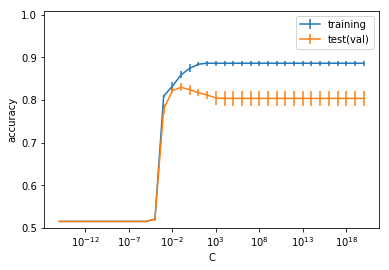

In [37]:
plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_train_score'],
             yerr=gs.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_test_score'],
             yerr=gs.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(.5, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(loc="best")

In [38]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 0.1},
 0.830102622576967,
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

In [39]:
gs.score(X_test, y_test)

0.8381962864721485

In [40]:
y_pred = gs.predict(X_test)

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.86      0.76      0.81       169
          1       0.82      0.90      0.86       208

avg / total       0.84      0.84      0.84       377



In [41]:
# 正則化パラメータがデフォルトのときとベストパラメータのときで結果はあまり変化せず。

In [42]:
#!pip install pydotplus

In [43]:
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

In [44]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [45]:
dt_params = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [3,5,7,10,20,50,100,200,500],
    'min_samples_leaf': [3,5,7,10,20,50,100,200,500]
}
dt_gs = GridSearchCV(DecisionTreeClassifier(),param_grid=dt_params,cv=5)
dt_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 10], 'min_samples_split': [3, 5, 7, 10, 20, 50, 100, 200, 500], 'min_samples_leaf': [3, 5, 7, 10, 20, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
dt_gs.best_params_, dt_gs.best_score_, dt_gs.best_estimator_

({'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 3},
 0.8323831242873432,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=20, min_samples_split=3,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'))

In [47]:
dt_gs.score(X_test, y_test)

0.8249336870026526

In [48]:
y_pred_dt = dt_gs.predict(X_test)

print(classification_report(y_test,y_pred_dt))

             precision    recall  f1-score   support

          0       0.84      0.76      0.80       169
          1       0.82      0.88      0.85       208

avg / total       0.83      0.82      0.82       377



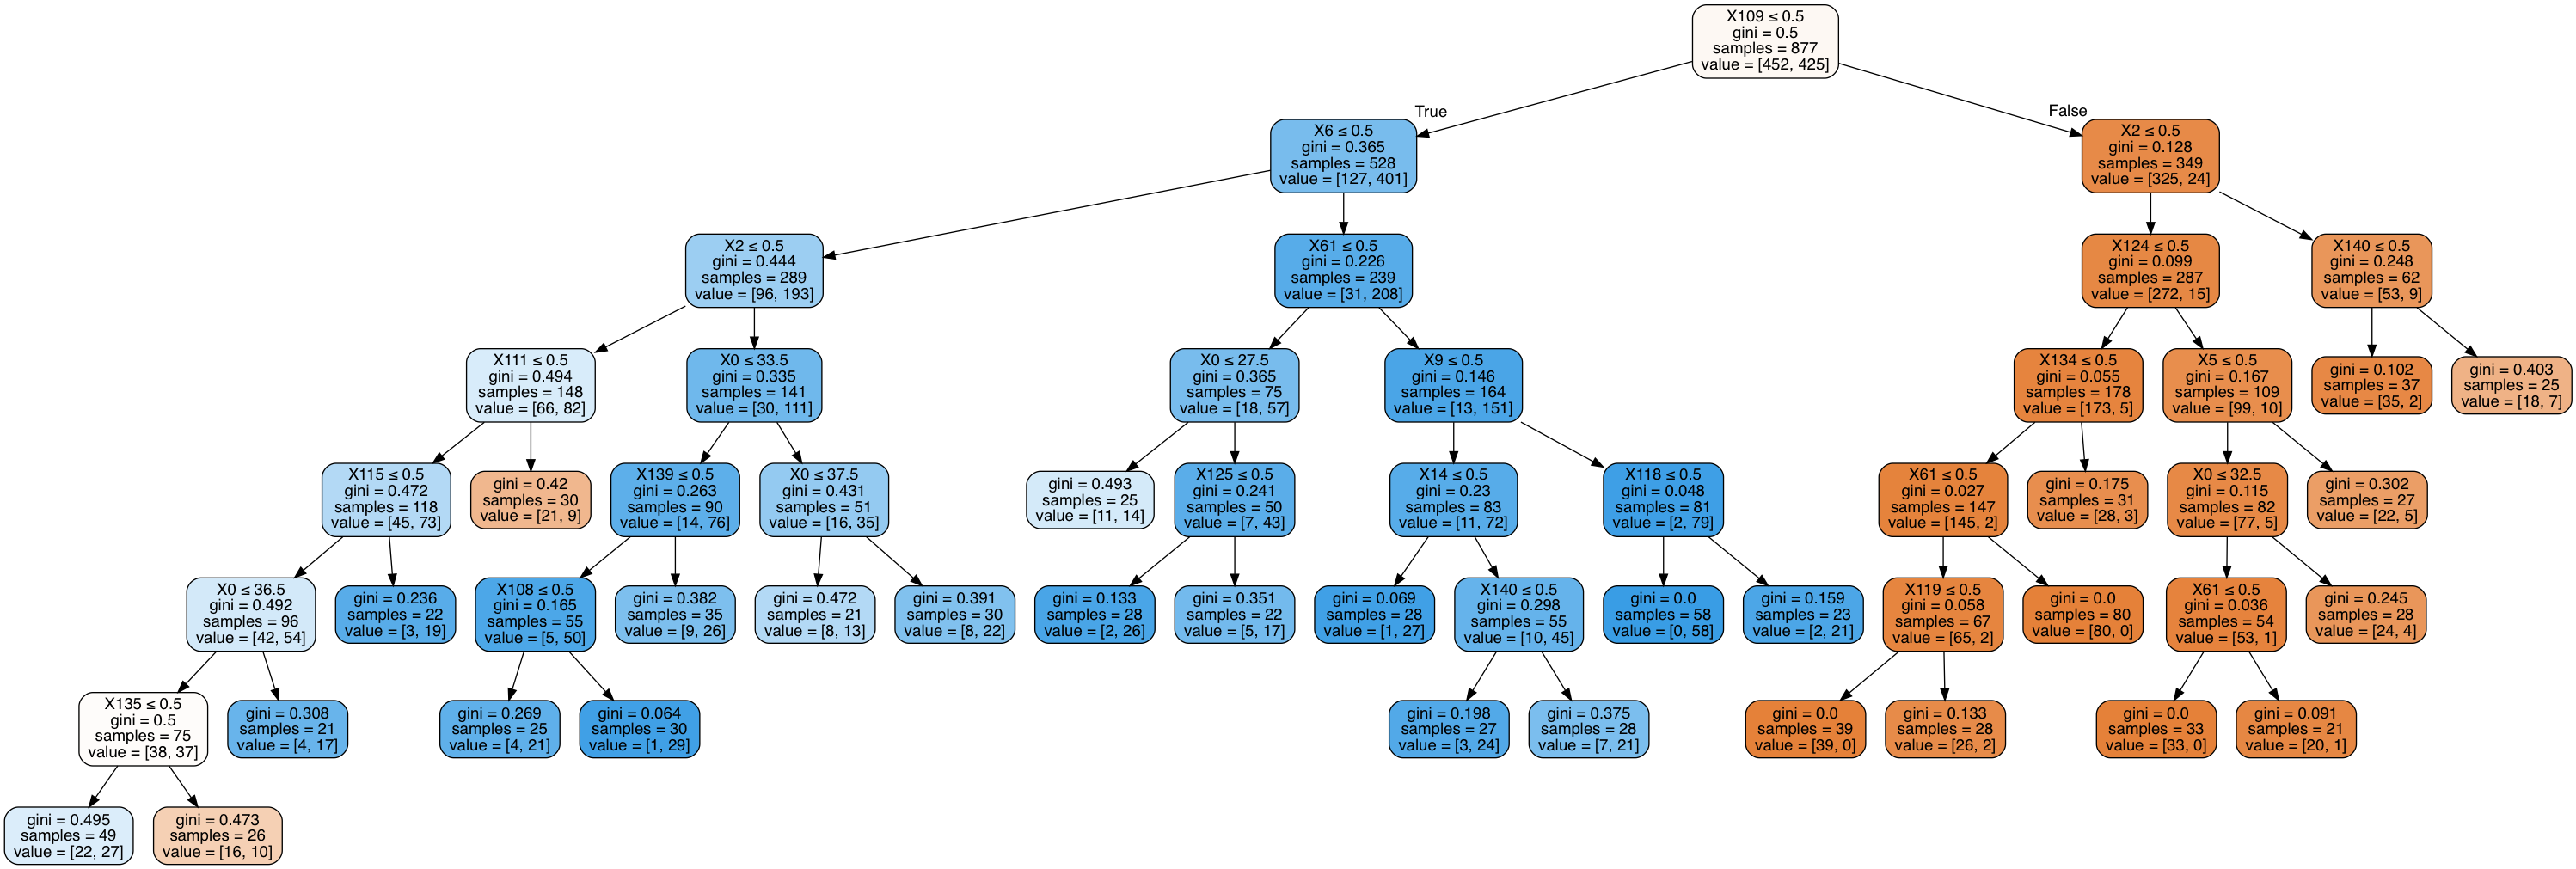

In [49]:
# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(dt_gs.best_estimator_, out_file=dot_data,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [50]:
## 決定木が重要とみなした説明変数
dt = dt_gs.best_estimator_
print(dt.feature_importances_)

[3.54170312e-02 0.00000000e+00 3.51359614e-02 0.00000000e+00
 0.00000000e+00 2.52183274e-03 4.31569040e-02 0.00000000e+00
 0.00000000e+00 3.83640157e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.18728742e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.11951934e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


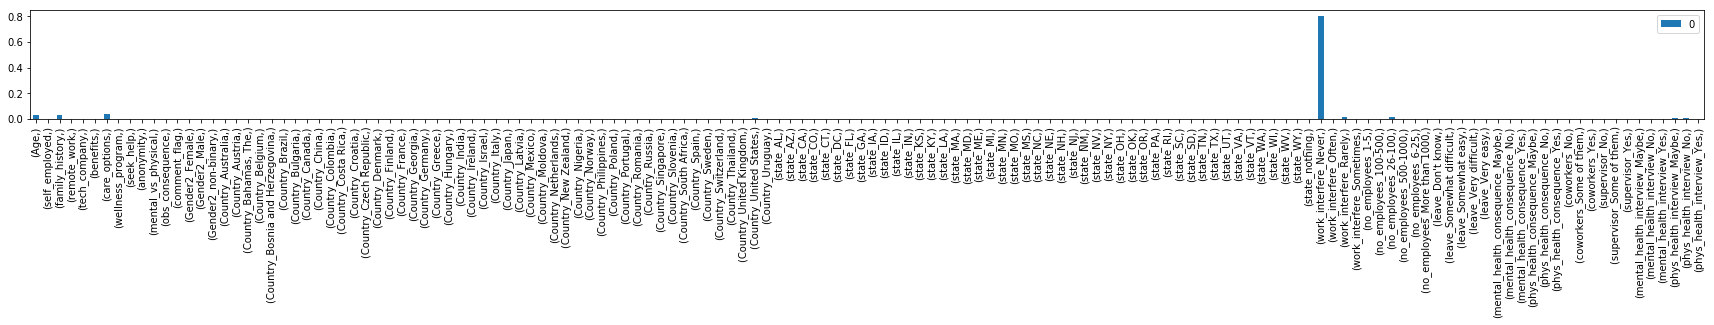

In [51]:
## 決定木が重要とみなした説明変数
pd.DataFrame(dt.feature_importances_, index=[X.keys()]).plot.bar(figsize=(30,2))

In [52]:
## ランダムフォレストでモデルを構築する
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_params = {
    'n_estimators':[3,5,7,10,12,15,20,25,30,35,40],
}
rf_gs = GridSearchCV(RandomForestClassifier(max_depth=7, min_samples_split=20, min_samples_leaf=3),param_grid=rf_params,cv=5)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 7, 10, 12, 15, 20, 25, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
rf_gs.best_params_, rf_gs.best_score_, rf_gs.best_estimator_

({'n_estimators': 35},
 0.8369441277080958,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=7, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=20,
             min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))

In [55]:
rf_gs.score(X_test, y_test)

0.8355437665782494

In [56]:
y_pred_rf = rf_gs.predict(X_test)

print(classification_report(y_test,y_pred_rf))

             precision    recall  f1-score   support

          0       0.88      0.73      0.80       169
          1       0.81      0.92      0.86       208

avg / total       0.84      0.84      0.83       377



In [57]:
## ランダムフォレストの説明変数重要度
rf = rf_gs.best_estimator_
print(rf.feature_importances_)

[1.87178086e-02 4.30065417e-03 6.85448182e-02 3.57166140e-03
 3.48173356e-03 2.51714880e-02 4.16251356e-02 9.23927267e-03
 3.76004839e-03 8.62886300e-03 2.23862486e-03 8.36508584e-03
 1.00056434e-02 1.35363910e-02 2.21037119e-02 1.33105206e-03
 1.63968734e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.03722151e-03 0.00000000e+00 3.78071624e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.01221097e-05
 0.00000000e+00 4.73098580e-04 0.00000000e+00 0.00000000e+00
 5.44515799e-04 8.77288241e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.04014376e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.09361526e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.44364345e-04
 0.00000000e+00 1.99083025e-04 0.00000000e+00 0.00000000e+00
 2.36166923e-03 6.32550035e-03 0.00000000e+00 0.00000000e+00
 1.20220373e-04 3.927212

/Users/kyousuke_kinoshita/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


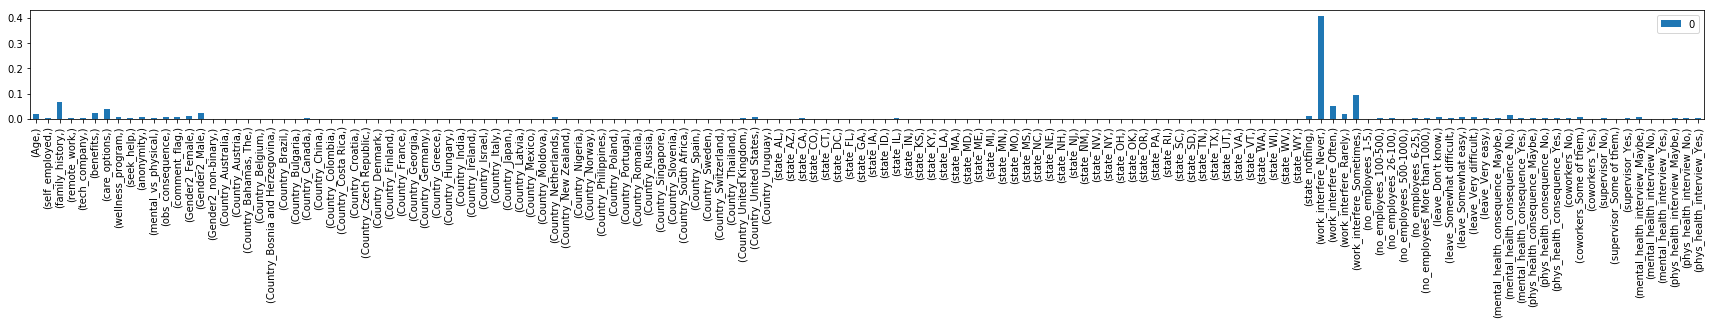

In [58]:
pd.DataFrame(rf.feature_importances_, index=[X.keys()]).plot.bar(figsize=(30,2))